In [1]:
# Dependencies and Setup
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#set figure size for charts
figsize_x = 14
figsize_y = 6

In [2]:
# Read climate csv File and store into Pandas data frame
climate_data = pd.read_csv("Climate_dataset2010_2018.csv", encoding = 'unicode_escape')

#drop any nan or empty rows
climate_data = climate_data.dropna()

#display dataframe
climate_data.head()

,Cities,State,Temp High °F,Temp Low °F,Year,Temp High °C,Temp Low °C,Days to 0 °F,Days 32 °F or below,Days rose to 70 °F,Days rose to 90 °F,Precipitation Days,Percipitation Inches,Percipitation Milli­metres,Snow Days,Snow Inches,Snow Centi­metres,weather measurements made at,Lat,Lng
0,Atlanta,GA,73.0,56.0,2018,23.0,13.0,0.0,30.0,218.0,66.0,140.0,70.1,1780.0,1,2.4,6,Atlanta's HartsfieldJackson International Air...,33.749,-84.38799
1,Atlanta,GA,75.0,56.0,2017,24.0,13.0,0.0,24.0,248.0,38.0,121.0,52.5,1334.0,1,2.3,6,Atlanta's HartsfieldJackson International Air...,33.749,-84.38799
2,Atlanta,GA,76.0,56.0,2016,24.0,13.0,0.0,29.0,246.0,88.0,88.0,38.7,983.0,0,0.3,1,Atlanta's HartsfieldJackson International Air...,33.749,-84.38799
3,Atlanta,GA,73.0,56.0,2015,23.0,13.0,0.0,37.0,241.0,49.0,148.0,68.4,1738.0,0,0.0,0,Atlanta's HartsfieldJackson International Air...,33.749,-84.38799
4,Atlanta,GA,72.0,53.0,2014,22.0,11.0,0.0,41.0,217.0,31.0,118.0,47.6,1210.0,2,4.6,12,Atlanta's HartsfieldJackson International Air...,33.749,-84.38799


In [3]:
#create dataframe from csv file
climate_data_df = pd.DataFrame(climate_data)

#list columns to use for data analysis
data_select_col_lst = ["Cities", "State", "Temp High °F", "Temp Low °F", "Year", 
                       "Precipitation Days", "Percipitation Inches", "Snow Days", "Snow Inches", \
                       "Lat", "Lng"]

#select the columns needed for dataframe for analysis
climate_data_df = climate_data_df[data_select_col_lst]

#display column type in dataframe
climate_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 0 to 458
Data columns (total 11 columns):
Cities                  451 non-null object
State                   451 non-null object
Temp High °F            451 non-null float64
Temp Low °F             451 non-null float64
Year                    451 non-null int64
Precipitation Days      451 non-null float64
Percipitation Inches    451 non-null float64
Snow Days               451 non-null int64
Snow Inches             451 non-null float64
Lat                     451 non-null float64
Lng                     451 non-null float64
dtypes: float64(7), int64(2), object(2)
memory usage: 42.3+ KB


In [4]:
#some measurement cols are in string and need to convert to numeric
convert_data_select_col_lst = ["Temp High °F", "Temp Low °F", "Precipitation Days", "Percipitation Inches"]

# Iterate over chosen columns
for col in convert_data_select_col_lst:  
    climate_data_df[col] = pd.to_numeric(climate_data_df[col])

#display column type in dataframe
climate_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 0 to 458
Data columns (total 11 columns):
Cities                  451 non-null object
State                   451 non-null object
Temp High °F            451 non-null float64
Temp Low °F             451 non-null float64
Year                    451 non-null int64
Precipitation Days      451 non-null float64
Percipitation Inches    451 non-null float64
Snow Days               451 non-null int64
Snow Inches             451 non-null float64
Lat                     451 non-null float64
Lng                     451 non-null float64
dtypes: float64(7), int64(2), object(2)
memory usage: 42.3+ KB


In [5]:
#get 2018 year climate data
climate_data_df_2018 = climate_data_df.loc[climate_data_df["Year"]== 2018, :]

#groupby by State and calculate median for numeric columns
climate_data_df_2018 = climate_data_df_2018.groupby(['State']).median()

#display dataframe all States
climate_data_df_2018.head(40)

,Temp High °F,Temp Low °F,Year,Precipitation Days,Percipitation Inches,Snow Days,Snow Inches,Lat,Lng
State,,,,,,,,,
AL,75.0,55.0,2018.0,129.0,61.10,0.0,0.00,33.518590,-86.810360
AZ,88.0,65.0,2018.0,33.0,9.30,0.0,0.00,33.448380,-112.074040
CA,76.0,55.0,2018.0,28.0,8.90,0.0,0.00,34.052240,-118.243680
CO,66.0,37.0,2018.0,71.0,11.70,71.0,26.80,39.739240,-104.990250
CT,61.0,42.0,2018.0,150.0,62.80,11.0,54.50,41.765800,-72.673370
DC,68.0,52.0,2018.0,131.0,66.30,2.0,7.30,38.889930,-77.009000
FL,84.0,68.0,2018.0,136.0,61.50,0.0,0.00,27.950600,-81.379230
GA,73.0,56.0,2018.0,140.0,70.10,1.0,2.40,33.749000,-84.387990
IL,60.0,44.0,2018.0,154.0,44.10,14.0,43.30,41.878110,-87.629800


In [6]:
#sort climate_data_df_2018 by highest temp for plotting ease
climate_data_df_2018_sorted = climate_data_df_2018.sort_values(by=['Temp High °F', 'Percipitation Inches', 'Snow Inches'])

#show sorted dataframe
climate_data_df_2018_sorted.head(40)

,Temp High °F,Temp Low °F,Year,Precipitation Days,Percipitation Inches,Snow Days,Snow Inches,Lat,Lng
State,,,,,,,,,
MN,55.0,38.0,2018.0,118.0,33.60,21.0,82.40,44.977750,-93.265020
WI,56.0,41.0,2018.0,135.0,45.10,13.0,50.10,43.038900,-87.906470
NY,59.0,42.0,2018.0,176.0,41.70,30.0,105.90,42.886450,-77.608850
MI,60.0,43.0,2018.0,143.0,43.90,14.0,45.80,42.331430,-83.045750
IL,60.0,44.0,2018.0,154.0,44.10,14.0,43.30,41.878110,-87.629800
MA,60.0,46.0,2018.0,143.0,53.30,10.0,51.00,42.360080,-71.058880
CT,61.0,42.0,2018.0,150.0,62.80,11.0,54.50,41.765800,-72.673370
RI,61.0,44.0,2018.0,137.0,63.50,10.0,49.80,41.823990,-71.412830
WA,62.0,47.0,2018.0,158.0,35.80,1.0,1.00,47.606210,-122.332070


In [7]:
#reset index for dataframe
climate_data_df_2018_sorted = climate_data_df_2018_sorted.reset_index()

#display resetted dataframe
climate_data_df_2018_sorted.head(40)

,State,Temp High °F,Temp Low °F,Year,Precipitation Days,Percipitation Inches,Snow Days,Snow Inches,Lat,Lng
0,MN,55.0,38.0,2018.0,118.0,33.60,21.0,82.40,44.977750,-93.265020
1,WI,56.0,41.0,2018.0,135.0,45.10,13.0,50.10,43.038900,-87.906470
2,NY,59.0,42.0,2018.0,176.0,41.70,30.0,105.90,42.886450,-77.608850
3,MI,60.0,43.0,2018.0,143.0,43.90,14.0,45.80,42.331430,-83.045750
4,IL,60.0,44.0,2018.0,154.0,44.10,14.0,43.30,41.878110,-87.629800
5,MA,60.0,46.0,2018.0,143.0,53.30,10.0,51.00,42.360080,-71.058880
6,CT,61.0,42.0,2018.0,150.0,62.80,11.0,54.50,41.765800,-72.673370
7,RI,61.0,44.0,2018.0,137.0,63.50,10.0,49.80,41.823990,-71.412830
8,WA,62.0,47.0,2018.0,158.0,35.80,1.0,1.00,47.606210,-122.332070
9,IN,63.0,45.0,2018.0,128.0,44.10,4.0,20.30,39.768400,-86.158070


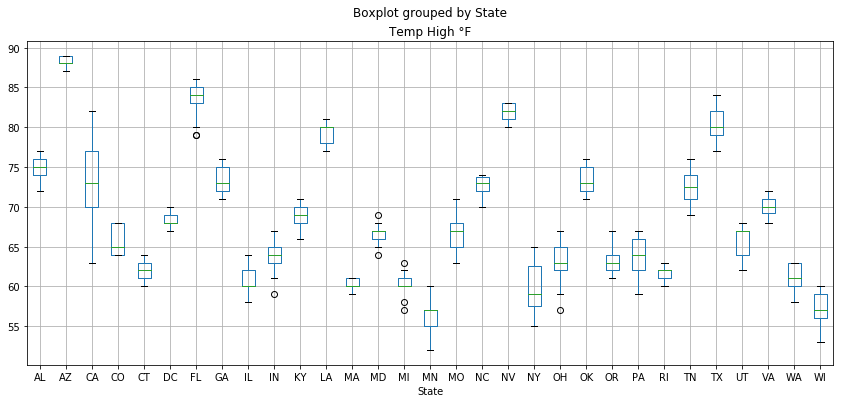

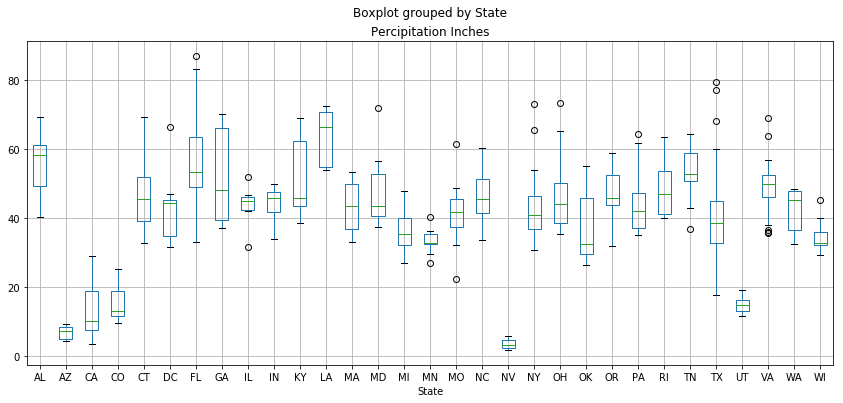

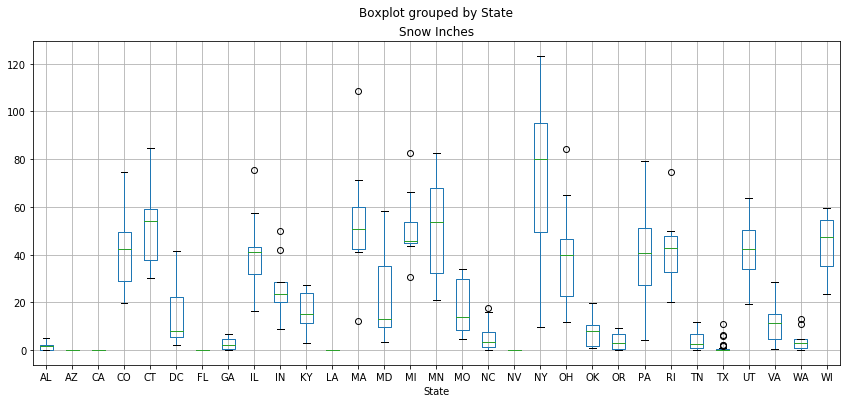

In [8]:
# Create a boxplots to visualize the spread for Temp High °F
climate_data_df.boxplot("Temp High °F", by="State", figsize=(figsize_x, figsize_y))
# Save the Figure
plt.savefig("Climate_images/hightemp_state_boxplot.png")

# Create a boxplots to visualize the spread for Percipitation Inches
climate_data_df.boxplot("Percipitation Inches", by="State", figsize=(figsize_x, figsize_y))
# Save the Figure
plt.savefig("Climate_images/percipitation_state_boxplot.png")

# Create a boxplots to visualize the spread for Snow Inches
climate_data_df.boxplot("Snow Inches", by="State", figsize=(figsize_x, figsize_y))
# Save the Figure
plt.savefig("Climate_images/snow_state_boxplot.png")

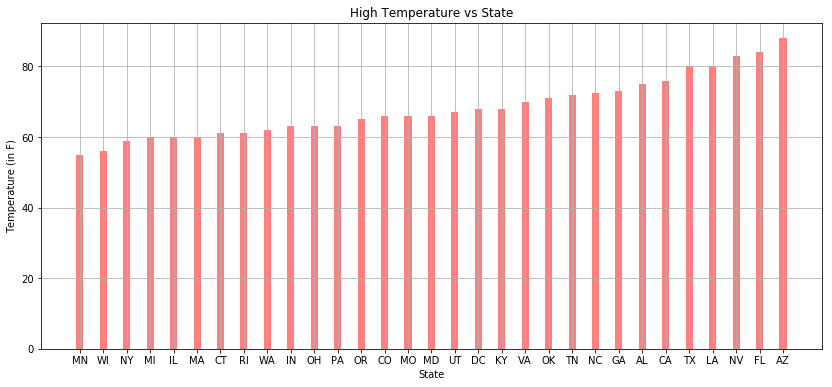

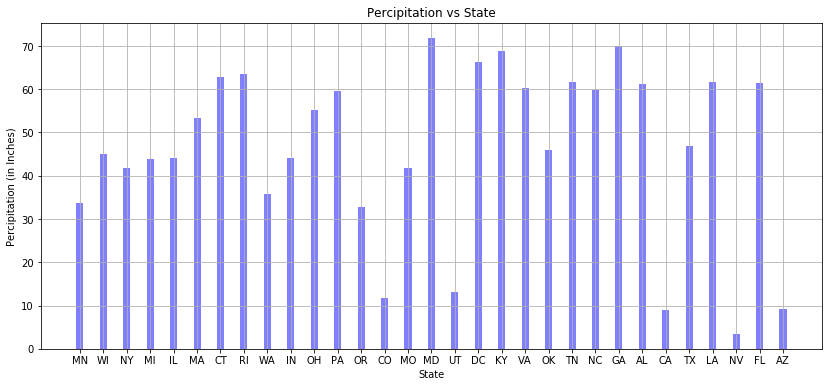

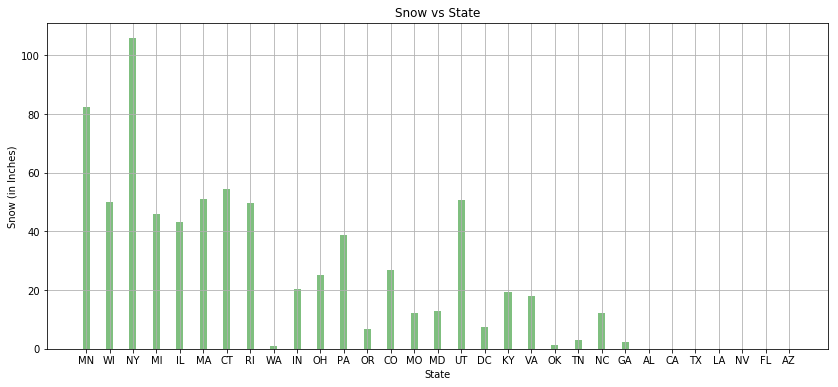

In [9]:
#setting bar stick width
width = 0.3

#plot High Temperature in F degree as bar chart
fig, ax1 = plt.subplots(figsize=(figsize_x, figsize_y))
plt.title('High Temperature vs State')
ax1.grid()
ax1.set_xlabel("State")
ax1.set_ylabel("Temperature (in F)")
percipitation = ax1.bar(climate_data_df_2018_sorted['State'], 
        climate_data_df_2018_sorted['Temp High °F'], 
        width=width, align='center', alpha=0.5, color='r')
# Save the Figure
plt.savefig("Climate_images/hightemp_state.png")

#plot Percipitation in Inches as bar chart
fig, ax2 = plt.subplots(figsize=(figsize_x, figsize_y))
plt.title("Percipitation vs State")
ax2.grid()
ax2.set_xlabel("State")
ax2.set_ylabel("Percipitation (in Inches)")
percipitation = ax2.bar(climate_data_df_2018_sorted['State'], 
        climate_data_df_2018_sorted['Percipitation Inches'], 
        width=width, align='center', alpha=0.5, color='b')
# Save the Figure
plt.savefig("Climate_images/percipitation_state.png")

#plot Snow in Inches as bar chart
fig, ax3 = plt.subplots(figsize=(figsize_x, figsize_y))
plt.title("Snow vs State")
ax3.grid()
ax3.set_xlabel("State")
ax3.set_ylabel("Snow (in Inches)")
snow = ax3.bar(climate_data_df_2018_sorted['State'], 
        climate_data_df_2018_sorted['Snow Inches'], 
        width=width, align='center', alpha=0.5, color='g')
# Save the Figure
plt.savefig("Climate_images/snow_state.png")

In [10]:
#Weight Summed Analysis to rank climate
no_of_metrics = 4

#Assigning weightage for each climate attribute
metric_weightage = 1/no_of_metrics

#Get the max for Temp High, Temp Low and Percipitation Inches but min for Snow Inches as snow condition is less favorable
temphigh_max = climate_data_df_2018_sorted['Temp High °F'].max()
templow_max = climate_data_df_2018_sorted['Temp Low °F'].max()
percipitation_max = climate_data_df_2018_sorted['Percipitation Inches'].max()
snow_min = climate_data_df_2018_sorted['Snow Inches'].min()

#handle if snow_min = 0 to set to 1 to avoid division error
if snow_min == 0:
    snow_min = 1

#calculate Weighted Sum Analysis for each climate attribute and sum them to get a final value
climate_data_df_2018_sorted['Temp High WSA'] = climate_data_df_2018_sorted['Temp High °F']/temphigh_max*metric_weightage
climate_data_df_2018_sorted['Temp Low WSA'] = climate_data_df_2018_sorted['Temp Low °F']/templow_max*metric_weightage
climate_data_df_2018_sorted['Percipitation Inches WSA'] = climate_data_df_2018_sorted['Percipitation Inches']/percipitation_max*metric_weightage
climate_data_df_2018_sorted['Snow Inches WSA'] = climate_data_df_2018_sorted['Snow Inches']/snow_min*metric_weightage
climate_data_df_2018_sorted['Total WSA'] = climate_data_df_2018_sorted['Temp High WSA']+climate_data_df_2018_sorted['Temp Low WSA']+climate_data_df_2018_sorted['Percipitation Inches WSA']+climate_data_df_2018_sorted['Snow Inches WSA']

In [11]:
#Display calculated WSA column
climate_data_df_2018_sorted.head()

,State,Temp High °F,Temp Low °F,Year,Precipitation Days,Percipitation Inches,Snow Days,Snow Inches,Lat,Lng,Temp High WSA,Temp Low WSA,Percipitation Inches WSA,Snow Inches WSA,Total WSA
0,MN,55.0,38.0,2018.0,118.0,33.6,21.0,82.4,44.97775,-93.26502,0.156250,0.139706,0.116992,20.600,21.012948
1,WI,56.0,41.0,2018.0,135.0,45.1,13.0,50.1,43.03890,-87.90647,0.159091,0.150735,0.157033,12.525,12.991860
2,NY,59.0,42.0,2018.0,176.0,41.7,30.0,105.9,42.88645,-77.60885,0.167614,0.154412,0.145195,26.475,26.942220
3,MI,60.0,43.0,2018.0,143.0,43.9,14.0,45.8,42.33143,-83.04575,0.170455,0.158088,0.152855,11.450,11.931398
4,IL,60.0,44.0,2018.0,154.0,44.1,14.0,43.3,41.87811,-87.62980,0.170455,0.161765,0.153552,10.825,11.310771


In [12]:
#Sort table by Total WSA to pick top 20 states
climate_data_df_2018_sorted_wsa = climate_data_df_2018_sorted.sort_values(by=['Total WSA'])

#show sorted table by WSA
climate_data_df_2018_sorted_wsa.head(40)

,State,Temp High °F,Temp Low °F,Year,Precipitation Days,Percipitation Inches,Snow Days,Snow Inches,Lat,Lng,Temp High WSA,Temp Low WSA,Percipitation Inches WSA,Snow Inches WSA,Total WSA
25,CA,76.0,55.0,2018.0,28.0,8.90,0.0,0.00,34.052240,-118.243680,0.215909,0.202206,0.030989,0.0000,0.449104
28,NV,83.0,62.0,2018.0,20.0,3.40,0.0,0.00,36.169940,-115.139830,0.235795,0.227941,0.011838,0.0000,0.475575
30,AZ,88.0,65.0,2018.0,33.0,9.30,0.0,0.00,33.448380,-112.074040,0.250000,0.238971,0.032382,0.0000,0.521352
26,TX,80.0,60.0,2018.0,101.5,46.85,0.0,0.00,30.013790,-97.270025,0.227273,0.220588,0.163127,0.0000,0.610988
24,AL,75.0,55.0,2018.0,129.0,61.10,0.0,0.00,33.518590,-86.810360,0.213068,0.202206,0.212744,0.0000,0.628018
27,LA,80.0,64.0,2018.0,139.0,61.60,0.0,0.00,29.951070,-90.071530,0.227273,0.235294,0.214485,0.0000,0.677052
29,FL,84.0,68.0,2018.0,136.0,61.50,0.0,0.00,27.950600,-81.379230,0.238636,0.250000,0.214136,0.0000,0.702773
8,WA,62.0,47.0,2018.0,158.0,35.80,1.0,1.00,47.606210,-122.332070,0.176136,0.172794,0.124652,0.2500,0.723582
20,OK,71.0,49.0,2018.0,84.0,45.90,0.0,1.30,35.467560,-97.516430,0.201705,0.180147,0.159819,0.3250,0.866671
23,GA,73.0,56.0,2018.0,140.0,70.10,1.0,2.40,33.749000,-84.387990,0.207386,0.205882,0.244081,0.6000,1.257349


In [13]:
#Plot States Geo Map of Temperature Datasets 

# Dependencies and Setup
import gmaps
import pandas as pd

# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [14]:
# Store latitude and longitude in locations
locations = climate_data[["Lat", "Lng"]]

# Store High Temp in temp
temp = climate_data["Temp High °F"]

In [15]:
# Plot Heatmap
fig_geo = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=temp, 
                                 dissipating=False, max_intensity=500,
                                 point_radius=0.7)

# Add layer
fig_geo.add_layer(heat_layer)

# Display figure
fig_geo

Figure(layout=FigureLayout(height='420px'))

In [16]:
# "Warmer climate preferred state to live in, correlate to home price?" Analysis

# Read climate csv File and store into Pandas data frame
homeprice_data = pd.read_csv("sfr_home_prices.csv")

#drop any nan or empty rows
homeprice_data = homeprice_data.dropna()

#display dataframe
homeprice_data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,Annual average
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,1028900,1034500,1037400,1038700,1041500,1042800,1042900,1044400,1047800,1049700,1048300,1047900,1042066.67
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,322700,326500,330400,332700,334500,335900,337000,338300,338400,336900,336000,336500,333816.67
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,1310100,1315300,1317900,1321100,1325300,1323800,1321200,1320700,1319500,1318800,1319700,1323300,1319725.00
3,93144,79936,El Paso,TX,El Paso,El Paso County,4,120300,120500,120800,121300,122200,123000,123600,124500,125600,126300,126800,127400,123525.00
4,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,5,173500,174600,175500,176400,176900,176900,177300,178000,178500,179300,180200,180700,177316.67


In [17]:
#create dataframe from csv file
homeprice_data_df = pd.DataFrame(homeprice_data)

#list columns to use for data analysis
homeprice_data_select_col_lst = ["State", "Annual average"]

#select the columns needed for dataframe for analysis
homeprice_data_df = homeprice_data_df[homeprice_data_select_col_lst]

#display column type in dataframe
homeprice_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14105 entries, 0 to 15507
Data columns (total 2 columns):
State             14105 non-null object
Annual average    14105 non-null float64
dtypes: float64(1), object(1)
memory usage: 330.6+ KB


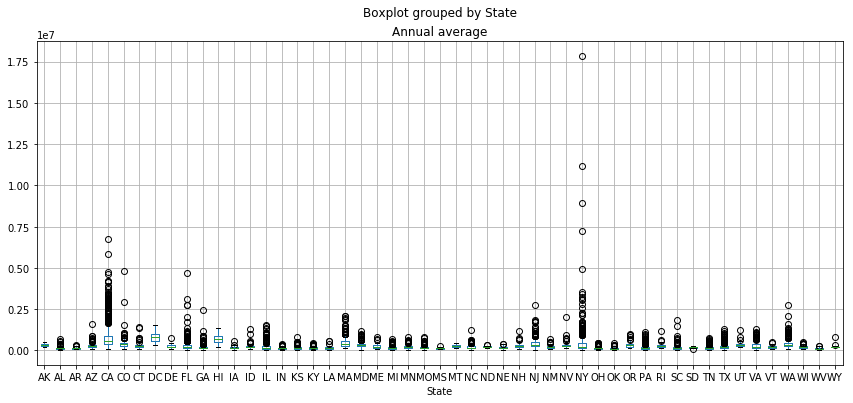

In [18]:
# Create a boxplots to visualize the spread for Temp High °F
homeprice_data_df.boxplot("Annual average", by="State", figsize=(figsize_x, figsize_y))

# Save the Figure
plt.savefig("Climate_images/annual_homeprice_spread_boxplot.png")

In [19]:
#groupby by State and calculate median for numeric columns
homeprice_data_df_grpby_state = homeprice_data_df.groupby(['State']).median()

#display dataframe all States
homeprice_data_df_grpby_state.head(50)

,Annual average
State,
AK,317000.000
AL,134750.000
AR,136891.670
AZ,242716.670
CA,574054.165
CO,371900.000
CT,250791.670
DC,790700.000
DE,239100.000


In [20]:
#reset index dataframe all States
homeprice_data_df_grpby_state = homeprice_data_df_grpby_state.reset_index()

#display dataframe all States
homeprice_data_df_grpby_state.head()

,State,Annual average
0,AK,317000.000
1,AL,134750.000
2,AR,136891.670
3,AZ,242716.670
4,CA,574054.165


In [21]:
#merge 2 sorted WSA climate dataset with home prices
homeprice_climatewsa_merged_df = pd.merge(homeprice_data_df_grpby_state, climate_data_df_2018_sorted_wsa, on='State', how='outer')

#drop NaN rows
homeprice_climatewsa_merged_df = homeprice_climatewsa_merged_df.dropna()

#sort dataframe by Climate WSA
homeprice_climatewsa_merged_df = homeprice_climatewsa_merged_df.sort_values(by=['Total WSA']).reset_index()

#display dataframe merged dataframe
homeprice_climatewsa_merged_df.head()

,index,State,Annual average,Temp High °F,Temp Low °F,Year,Precipitation Days,Percipitation Inches,Snow Days,Snow Inches,Lat,Lng,Temp High WSA,Temp Low WSA,Percipitation Inches WSA,Snow Inches WSA,Total WSA
0,4,CA,574054.165,76.0,55.0,2018.0,28.0,8.90,0.0,0.0,34.05224,-118.243680,0.215909,0.202206,0.030989,0.0,0.449104
1,33,NV,299350.000,83.0,62.0,2018.0,20.0,3.40,0.0,0.0,36.16994,-115.139830,0.235795,0.227941,0.011838,0.0,0.475575
2,3,AZ,242716.670,88.0,65.0,2018.0,33.0,9.30,0.0,0.0,33.44838,-112.074040,0.250000,0.238971,0.032382,0.0,0.521352
3,43,TX,181587.500,80.0,60.0,2018.0,101.5,46.85,0.0,0.0,30.01379,-97.270025,0.227273,0.220588,0.163127,0.0,0.610988
4,1,AL,134750.000,75.0,55.0,2018.0,129.0,61.10,0.0,0.0,33.51859,-86.810360,0.213068,0.202206,0.212744,0.0,0.628018


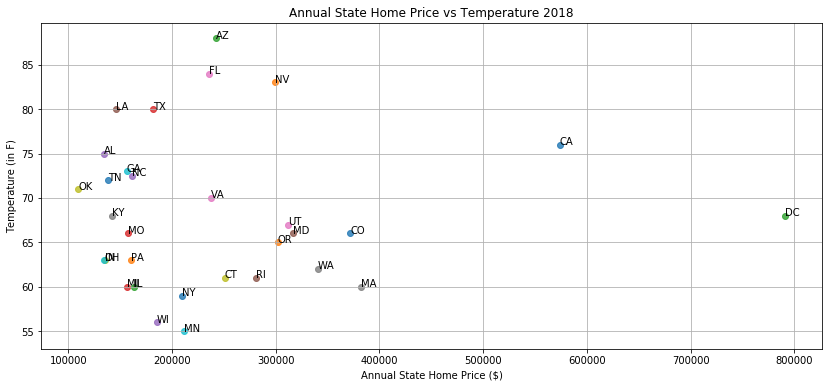

In [37]:
#plot scatter to see correlation between home prices and climate by sorted WSA State
fig, ax4 = plt.subplots(figsize=(figsize_x, figsize_y))

#plot scatter chart
#plt.scatter(homeprice_climatewsa_merged_df['Annual average'], homeprice_climatewsa_merged_df['Temp High °F'], alpha=0.8)

for i in range(len(homeprice_climatewsa_merged_df)):  
    plt.scatter(homeprice_climatewsa_merged_df.loc[i, 'Annual average'], 
                homeprice_climatewsa_merged_df.loc[i, 'Temp High °F'],
                alpha=0.8)
    #label dot by State
    ax4.annotate(homeprice_climatewsa_merged_df.loc[i, 'State'], (homeprice_climatewsa_merged_df.loc[i, 'Annual average']+3, 
                homeprice_climatewsa_merged_df.loc[i, 'Temp High °F']))

#label, enable grid and title scatter plot
plt.title('Annual State Home Price vs Temperature 2018')
plt.xlabel('Annual State Home Price ($)')
plt.ylabel('Temperature (in F)')
ax4.grid()

# Save the Figure
plt.savefig("Climate_images/annual_homeprice_vs_Temperature.png")

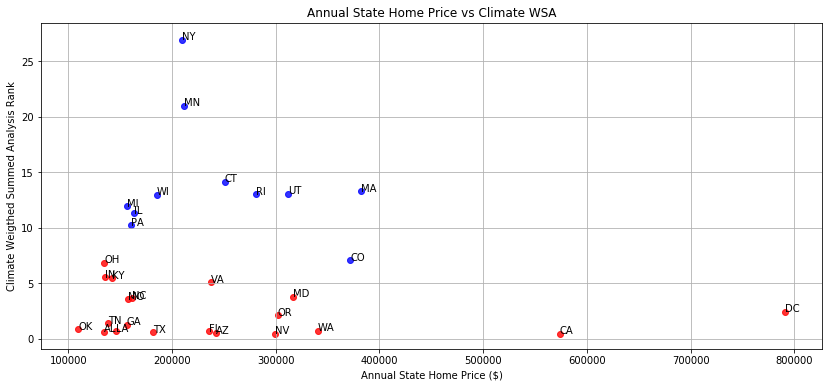

In [34]:
#plot scatter to see correlation between home prices and climate by sorted WSA State
fig, ax5 = plt.subplots(figsize=(figsize_x, figsize_y))

#plot scatter chart with coloring Red for top 20 selected State, the rest will be as Blue
for i in range(len(homeprice_climatewsa_merged_df)):
    if i < 20:
        color = 'red'
    else:
        color = 'blue'    
    plt.scatter(homeprice_climatewsa_merged_df.loc[i, 'Annual average'], 
                homeprice_climatewsa_merged_df.loc[i, 'Total WSA'],
                c=color, alpha=0.8)
    #label dot by State
    ax5.annotate(homeprice_climatewsa_merged_df.loc[i, 'State'], (homeprice_climatewsa_merged_df.loc[i, 'Annual average']+3, 
                homeprice_climatewsa_merged_df.loc[i, 'Total WSA']))
    
#label, enable grid and title scatter plot    
plt.title('Annual State Home Price vs Climate WSA')
plt.xlabel('Annual State Home Price ($)')
plt.ylabel('Climate Weigthed Summed Analysis Rank')
ax5.grid()

# Save the Figure
plt.savefig("Climate_images/annual_homeprice_vs_ClimateWSA.png")